In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
base_dir = '/content/drive/My Drive/fruit_dataset/'
!ls "/content/drive/My Drive/fruit_dataset/"

test  train  validation


In [3]:
# Menentukan Direktori 
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 15,
    class_mode = 'categorical'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 15,
    class_mode = 'categorical'
)


Found 1830 images belonging to 2 classes.
Found 1830 images belonging to 2 classes.


In [7]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallBack()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed = 112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed = 112),
    tf.keras.layers.Dense(2, activation = 'sigmoid'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 9,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1, 
    callbacks = [callbacks]
)

Epoch 1/9
6/6 [==============================] - 35s 6s/step - loss: 0.4219 - accuracy: 0.8556 - val_loss: 0.6400 - val_accuracy: 0.8000
Epoch 2/9
6/6 [==============================] - 29s 5s/step - loss: 0.4706 - accuracy: 0.8667 - val_loss: 0.6161 - val_accuracy: 0.7333
Epoch 3/9
6/6 [==============================] - 24s 4s/step - loss: 0.4035 - accuracy: 0.8889 - val_loss: 0.6090 - val_accuracy: 0.7333
Epoch 4/9
6/6 [==============================] - 24s 4s/step - loss: 0.4124 - accuracy: 0.8889 - val_loss: 0.5245 - val_accuracy: 0.7333
Epoch 5/9
6/6 [==============================] - 23s 4s/step - loss: 0.4482 - accuracy: 0.8222 - val_loss: 0.2044 - val_accuracy: 0.9333
Epoch 6/9
6/6 [==============================] - 20s 3s/step - loss: 0.4652 - accuracy: 0.8111 - val_loss: 0.2398 - val_accuracy: 1.0000
Epoch 7/9
6/6 [==============================] - 18s 3s/step - loss: 0.3955 - accuracy: 0.8333 - val_loss: 0.2061 - val_accuracy: 0.9333
Epoch 8/9
6/6 [==========================

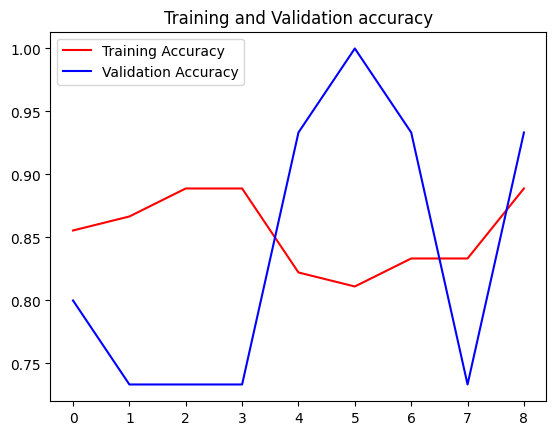

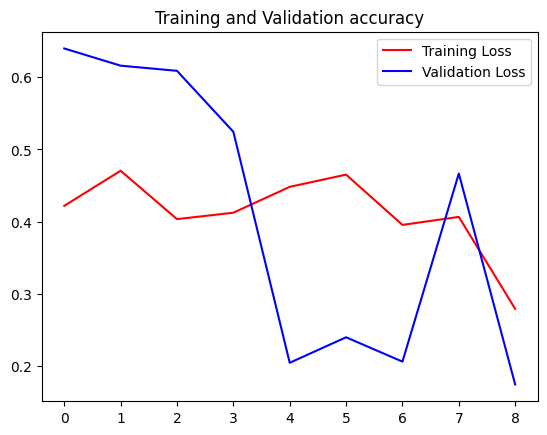

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()


Saving Screen Shot 2018-06-13 at 12.07.32 AM.png to Screen Shot 2018-06-13 at 12.07.32 AM.png
1/1 [==============================] - 0s 44ms/step
Screen Shot 2018-06-13 at 12.07.32 AM.png
This image is fresh_orange


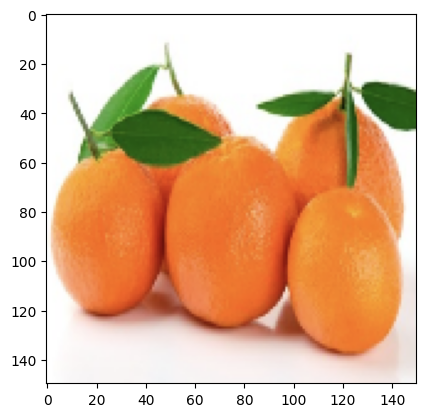

In [15]:
import numpy as np
import keras.utils as image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  # Prediksi Gambar
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image is', class_list[j-1])
      break